In [3]:
stock_name =input()

TSLA


In [114]:
#pip install vaderSentiment

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

In [2]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

In [4]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
fetch_tweets=tweepy.Cursor(api.search_tweets, q=stock_name,count=100, lang ="en", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

Rate limit reached. Sleeping for: 630


TweepyException: Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [1]:
data

In [10]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    # index=index+1
#print(cdata.dtypes)

In [11]:
cdata

,Date,Tweets
0,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...
1,2022-03-29,RUSSIAN COMMUNICATIONS REGULATOR THREATENS GOO...
2,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...
3,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...
4,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...
...,...,...
5818,2022-03-21,RT smartertrader If war ends not ceasefire en...
5819,2022-03-21,RT smartertrader Googl if breaks 2800 it will ...
5820,2022-03-21,Stock GOOGL REALTIME TREND SELLBUY 3432 SEL...
5821,2022-03-21,RT smartertrader If war ends not ceasefire en...


In [12]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [13]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [14]:
ccdata

,Date,Tweets
0,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...
1,2022-03-28,link Screw your bridgesfuck your sidechains a...
2,2022-03-27,throwabull SpacBobby GOOGL is a long term hol...
3,2022-03-26,RT IntrinsicInv 120 My driver on a recent mor...
4,2022-03-25,Jim Cramer says to buy FAANG stocks next time...
5,2022-03-24,From TSLA to GOOGL LFG I thought this was hil...
6,2022-03-23,The Big Five FAANG Stock and Sector Service i...
7,2022-03-22,A few othersBAND off significantly from high...


In [15]:
#downloading the data
read_stock_p = yf.download(stock_name,start =(date.today() - timedelta(days=15)).strftime("%Y-%m-%d"),end = date.today().strftime("%Y-%m-%d"),interval='1d')

[*********************100%***********************]  1 of 1 completed


In [16]:
read_stock_p.reset_index(inplace=True)
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-14,2605.000000,2608.179932,2505.500000,2519.020020,2519.020020,1940600
1,2022-03-15,2539.520020,2597.090088,2514.409912,2583.959961,2583.959961,1546000
2,2022-03-16,2614.659912,2666.659912,2574.689941,2665.610107,2665.610107,1778800
3,2022-03-17,2662.979980,2681.610107,2643.699951,2676.780029,2676.780029,1413200
4,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
5,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
6,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
7,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
8,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1319800
9,2022-03-25,2838.320068,2840.699951,2794.750000,2833.459961,2833.459961,1206300


In [17]:
ccdata['Prices']=""

In [18]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(get_stock_date==get_tweet_date):
            #print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])
            
            
ccdata            

,Date,Tweets,Prices
0,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...,
1,2022-03-28,link Screw your bridgesfuck your sidechains a...,2829
2,2022-03-27,throwabull SpacBobby GOOGL is a long term hol...,
3,2022-03-26,RT IntrinsicInv 120 My driver on a recent mor...,
4,2022-03-25,Jim Cramer says to buy FAANG stocks next time...,2833
5,2022-03-24,From TSLA to GOOGL LFG I thought this was hil...,2831
6,2022-03-23,The Big Five FAANG Stock and Sector Service i...,2765
7,2022-03-22,A few othersBAND off significantly from high...,2797


In [19]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

ccdata        

,Date,Tweets,Prices
0,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...,2811
1,2022-03-28,link Screw your bridgesfuck your sidechains a...,2829
2,2022-03-27,throwabull SpacBobby GOOGL is a long term hol...,2811
3,2022-03-26,RT IntrinsicInv 120 My driver on a recent mor...,2811
4,2022-03-25,Jim Cramer says to buy FAANG stocks next time...,2833
5,2022-03-24,From TSLA to GOOGL LFG I thought this was hil...,2831
6,2022-03-23,The Big Five FAANG Stock and Sector Service i...,2765
7,2022-03-22,A few othersBAND off significantly from high...,2797


In [20]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...,2811,,,,
1,2022-03-28,link Screw your bridgesfuck your sidechains a...,2829,,,,
2,2022-03-27,throwabull SpacBobby GOOGL is a long term hol...,2811,,,,
3,2022-03-26,RT IntrinsicInv 120 My driver on a recent mor...,2811,,,,
4,2022-03-25,Jim Cramer says to buy FAANG stocks next time...,2833,,,,
5,2022-03-24,From TSLA to GOOGL LFG I thought this was hil...,2831,,,,
6,2022-03-23,The Big Five FAANG Stock and Sector Service i...,2765,,,,
7,2022-03-22,A few othersBAND off significantly from high...,2797,,,,


In [100]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [81]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['pos']
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)
        
ccdata        

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-03-29,RT DeItaone RUSSIAN COMMUNICATIONS REGULATOR T...,2811,1.0,0.022,0.885,0.093
1,2022-03-28,link Screw your bridgesfuck your sidechains a...,2829,1.0,0.034,0.851,0.115
2,2022-03-27,throwabull SpacBobby GOOGL is a long term hol...,2811,1.0,0.019,0.891,0.09
3,2022-03-26,RT IntrinsicInv 120 My driver on a recent mor...,2811,1.0,0.025,0.905,0.07
4,2022-03-25,Jim Cramer says to buy FAANG stocks next time...,2833,1.0,0.032,0.84,0.128
5,2022-03-24,From TSLA to GOOGL LFG I thought this was hil...,2831,1.0,0.035,0.839,0.126
6,2022-03-23,The Big Five FAANG Stock and Sector Service i...,2765,1.0,0.031,0.847,0.123
7,2022-03-22,A few othersBAND off significantly from high...,2797,1.0,0.038,0.863,0.099


% of positive tweets=  100.0
% of negative tweets=  0.0


[]

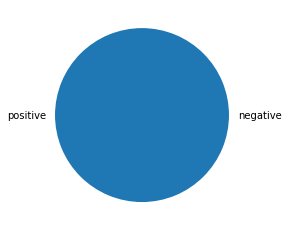

In [22]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [23]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2022-03-29,2811,1.0,0.022,0.885,1.0
1,2022-03-28,2829,1.0,0.034,0.851,1.0
2,2022-03-27,2811,1.0,0.019,0.891,1.0
3,2022-03-26,2811,1.0,0.025,0.905,1.0
4,2022-03-25,2833,1.0,0.032,0.84,1.0
5,2022-03-24,2831,1.0,0.035,0.839,1.0
6,2022-03-23,2765,1.0,0.031,0.847,1.0
7,2022-03-22,2797,1.0,0.038,0.863,1.0


In [24]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]
#Making a 2D array that will store the Negative and Positive sentiment for Training dataset.
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
print(numpy_df_train)

[[0.022 1.   ]
 [0.034 1.   ]
 [0.019 1.   ]
 [0.025 1.   ]
 [0.032 1.   ]
 [0.035 1.   ]]


In [25]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)
print(numpy_df_test)

[[0.031 1.   ]
 [0.038 1.   ]]


In [26]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0    2811
1    2829
2    2811
3    2811
4    2833
5    2831


In [27]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

prediction = rf.predict(numpy_df_test)
print(prediction)

[2831.66 2830.48]


<ipython-input-27-2d5395fbe1f6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(numpy_df_train, y_train)


2830.48

In [49]:
#downloading the data
stock_df = yf.download(stock_name,start ="2012-01-01",end = date.today().strftime("%Y-%m-%d"),interval='1d')

[*********************100%***********************]  1 of 1 completed


In [50]:
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,326.796783,334.409424,326.511505,333.038025,333.038025,7345647
2012-01-04,332.847839,335.460449,330.640656,334.474487,334.474487,5722272
2012-01-05,331.396393,332.317322,328.443451,329.834839,329.834839,6559234
2012-01-06,329.904907,330.330322,325.220215,325.335327,325.335327,5380414
2012-01-09,323.573578,323.823822,310.925934,311.541534,311.541534,11633555
...,...,...,...,...,...,...
2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1319800
2022-03-25,2838.320068,2840.699951,2794.750000,2833.459961,2833.459961,1206300


In [51]:
df1 =stock_df.copy()

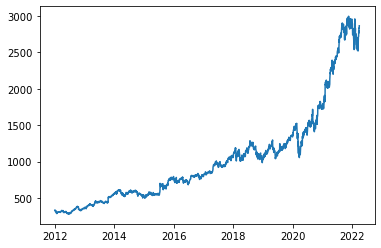

In [52]:
import matplotlib.pyplot as plt
plt.plot(df1['Close'])

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[1.63597549e-05]
 [1.64322075e-05]
 [1.48681139e-05]
 ...
 [3.06347562e-04]
 [3.06347562e-04]
 [2.48582303e-01]]


In [39]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(6126, 3300)

In [40]:
train_data

array([[1.63597549e-05],
       [1.64322075e-05],
       [1.48681139e-05],
       ...,
       [1.15241344e-04],
       [1.15241344e-04],
       [2.02043104e-01]])

In [41]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(6025, 100)
(6025,)
(3199, 100)
(3199,)


(None, None)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=25,batch_size=64,verbose=1)


Epoch 1/25
95/95 [==============================] - 19s 160ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 2/25
95/95 [==============================] - 16s 171ms/step - loss: 0.0090 - val_loss: 0.0068
Epoch 3/25
95/95 [==============================] - 16s 171ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 4/25
95/95 [==============================] - 17s 179ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 5/25
95/95 [==============================] - 16s 172ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 6/25
95/95 [==============================] - 17s 182ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 7/25
95/95 [==============================] - 17s 182ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 8/25
95/95 [==============================] - 16s 168ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/25
95/95 [==============================] - 16s 171ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 10/25
95/95 [==============================] - 16s 166ms/step - loss: 0.0017 - val_lo

In [44]:
import tensorflow as tf
tf.__version__
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

685570.2419896254

In [46]:
len(test_data)
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 2959)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.4499396293137439,
 8.152173653463853e-05,
 8.558467898619293e-05,
 7.974455146000826e-05,
 8.30545807718384e-05,
 8.30545807718384e-05,
 0.29990895847651383,
 8.445245661033563e-05,
 8.53360721554334e-05,
 8.034120091725666e-05,
 8.307304940149514e-05,
 8.307304940149514e-05,
 0.4111427576106405,
 8.652085642470813e-05,
 8.769997004431364e-05,
 8.429050493675417e-05,
 8.613729853668222e-05,
 8.613729853668222e-05,
 0.36251526151407404,
 8.484312448724347e-05,
 8.582759782584694e-05,
 8.293239301168693e-05,
 8.360151233122215e-05,
 8.360151233122215e-05,
 0.25058536325382064,
 8.098189762270043e-05,
 8.201752819838122e-05,
 7.562478112170728e-05,
 7.664194306773133e-05,
 7.664194306773133e-05,
 0.3525567821790775,
 8.07546034171504e-05,
 8.626231295095017e-05,
 8.019913987110834e-05,
 8.321226645209067e-05,
 8.321226645209067e-05,
 0.32874735084462076,
 8.425356767744072e-05,
 8.743716057722652e-05,
 8.351343517626763e-05,
 8.5024966788258e-05,
 8.5024966788258e-05,
 0.24284303623873

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [8.15217365e-05 8.55846790e-05 7.97445515e-05 ... 3.06347562e-04
 3.06347562e-04 2.48582303e-01]


ValueError: cannot reshape array of size 2958 into shape (1,100,1)

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

DAYS = 30
BATCH_SIZE = 32
EPOCHS = 10

In [61]:
training_size=int(len(df1)*0.75)
test_size=len(stock_df)-training_size
#train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
print(training_size,test_size)

1932 645


In [68]:
test_set = stock_df.copy()
test_set.dropna(inplace=True)
test_set = test_set[training_size:]
test_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-09,1207.079956,1220.550049,1193.170044,1205.270020,1205.270020,1592700
2019-09-10,1196.089966,1210.000000,1196.010010,1205.699951,1205.699951,1396100
2019-09-11,1203.890015,1222.469971,1202.280029,1220.000000,1220.000000,1176100
2019-09-12,1223.469971,1242.420044,1222.560059,1234.969971,1234.969971,1582200
2019-09-13,1232.109985,1241.050049,1227.079956,1240.030029,1240.030029,1183800
...,...,...,...,...,...,...
2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1319800
2022-03-25,2838.320068,2840.699951,2794.750000,2833.459961,2833.459961,1206300


In [63]:
training_set = stock_df.copy()
training_set.dropna(inplace=True)
training_set = training_set[0:training_size]
training_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,326.796783,334.409424,326.511505,333.038025,333.038025,7345647
2012-01-04,332.847839,335.460449,330.640656,334.474487,334.474487,5722272
2012-01-05,331.396393,332.317322,328.443451,329.834839,329.834839,6559234
2012-01-06,329.904907,330.330322,325.220215,325.335327,325.335327,5380414
2012-01-09,323.573578,323.823822,310.925934,311.541534,311.541534,11633555
...,...,...,...,...,...,...
2019-08-30,1200.349976,1200.349976,1185.719971,1190.530029,1190.530029,903200
2019-09-03,1181.849976,1189.079956,1163.709961,1169.550049,1169.550049,1295400
2019-09-04,1179.449951,1184.880005,1171.530029,1182.270020,1182.270020,1065600


In [64]:
training_set = training_set.iloc[:, 0:1].values ## contains only open values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
training_set_sc = sc.fit_transform(training_set)
training_set_sc

array([[0.045948  ],
       [0.05194704],
       [0.05050807],
       ...,
       [0.89127257],
       [0.90536052],
       [0.92070745]])

In [65]:
X_train = []
y_train = []
for i in range(DAYS, len(training_set_sc)):
    X_train.append(training_set_sc[i-DAYS:i, 0])
    y_train.append(training_set_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [66]:
rnn = tf.keras.models.Sequential()

rnn.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(DAYS, 1)))

rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75))
rnn.add(tf.keras.layers.Dropout(0.2))

rnn.add(tf.keras.layers.Dense(1))

rnn.compile(optimizer="adam", loss="mean_squared_error")

In [73]:
previous30days = []
for i in range(len(stock_df)-len(test_set), len(stock_df)):
    previous30days.append(stock_df[i-DAYS:i])
previous30days = np.array(previous30days)

previous30days

array([[[1.22800000e+03, 1.26839001e+03, 1.22800000e+03, 1.24521997e+03,
         1.24521997e+03, 6.06080000e+06],
        [1.24250000e+03, 1.24898999e+03, 1.23019995e+03, 1.24183997e+03,
         1.24183997e+03, 2.06910000e+06],
        [1.22700000e+03, 1.23691003e+03, 1.22531995e+03, 1.22800000e+03,
         1.22800000e+03, 1.43080000e+06],
        ...,
        [1.17944995e+03, 1.18488000e+03, 1.17153003e+03, 1.18227002e+03,
         1.18227002e+03, 1.06560000e+06],
        [1.19366003e+03, 1.21400000e+03, 1.19268994e+03, 1.21218994e+03,
         1.21218994e+03, 1.31970000e+06],
        [1.20914001e+03, 1.21294995e+03, 1.20326001e+03, 1.20631995e+03,
         1.20631995e+03, 9.48600000e+05]],

       [[1.24250000e+03, 1.24898999e+03, 1.23019995e+03, 1.24183997e+03,
         1.24183997e+03, 2.06910000e+06],
        [1.22700000e+03, 1.23691003e+03, 1.22531995e+03, 1.22800000e+03,
         1.22800000e+03, 1.43080000e+06],
        [1.22487000e+03, 1.23491003e+03, 1.20818005e+03, 1.218199

In [74]:
scaled_test_data = sc.transform(previous30days.reshape(-1, 1))
scaled_test_data = scaled_test_data.reshape(-1, DAYS)
scaled_test_data = scaled_test_data.reshape(scaled_test_data.shape[0], DAYS, 1)


In [75]:
y_pred = sc.inverse_transform(rnn.predict(scaled_test_data))
y_pred = y_pred.reshape(-1,)

In [76]:
y_pred

array([300.47485, 299.63553, 298.61453, ..., 315.24567, 315.41437,
       316.72168], dtype=float32)

In [78]:
predicted_data = pd.DataFrame({"Predicted": y_pred})
predicted_data

,Predicted
0,300.474854
1,299.635529
2,298.614532
3,298.541779
4,298.581543
...,...
3865,315.427673
3866,315.226898
3867,315.245667
3868,315.414368


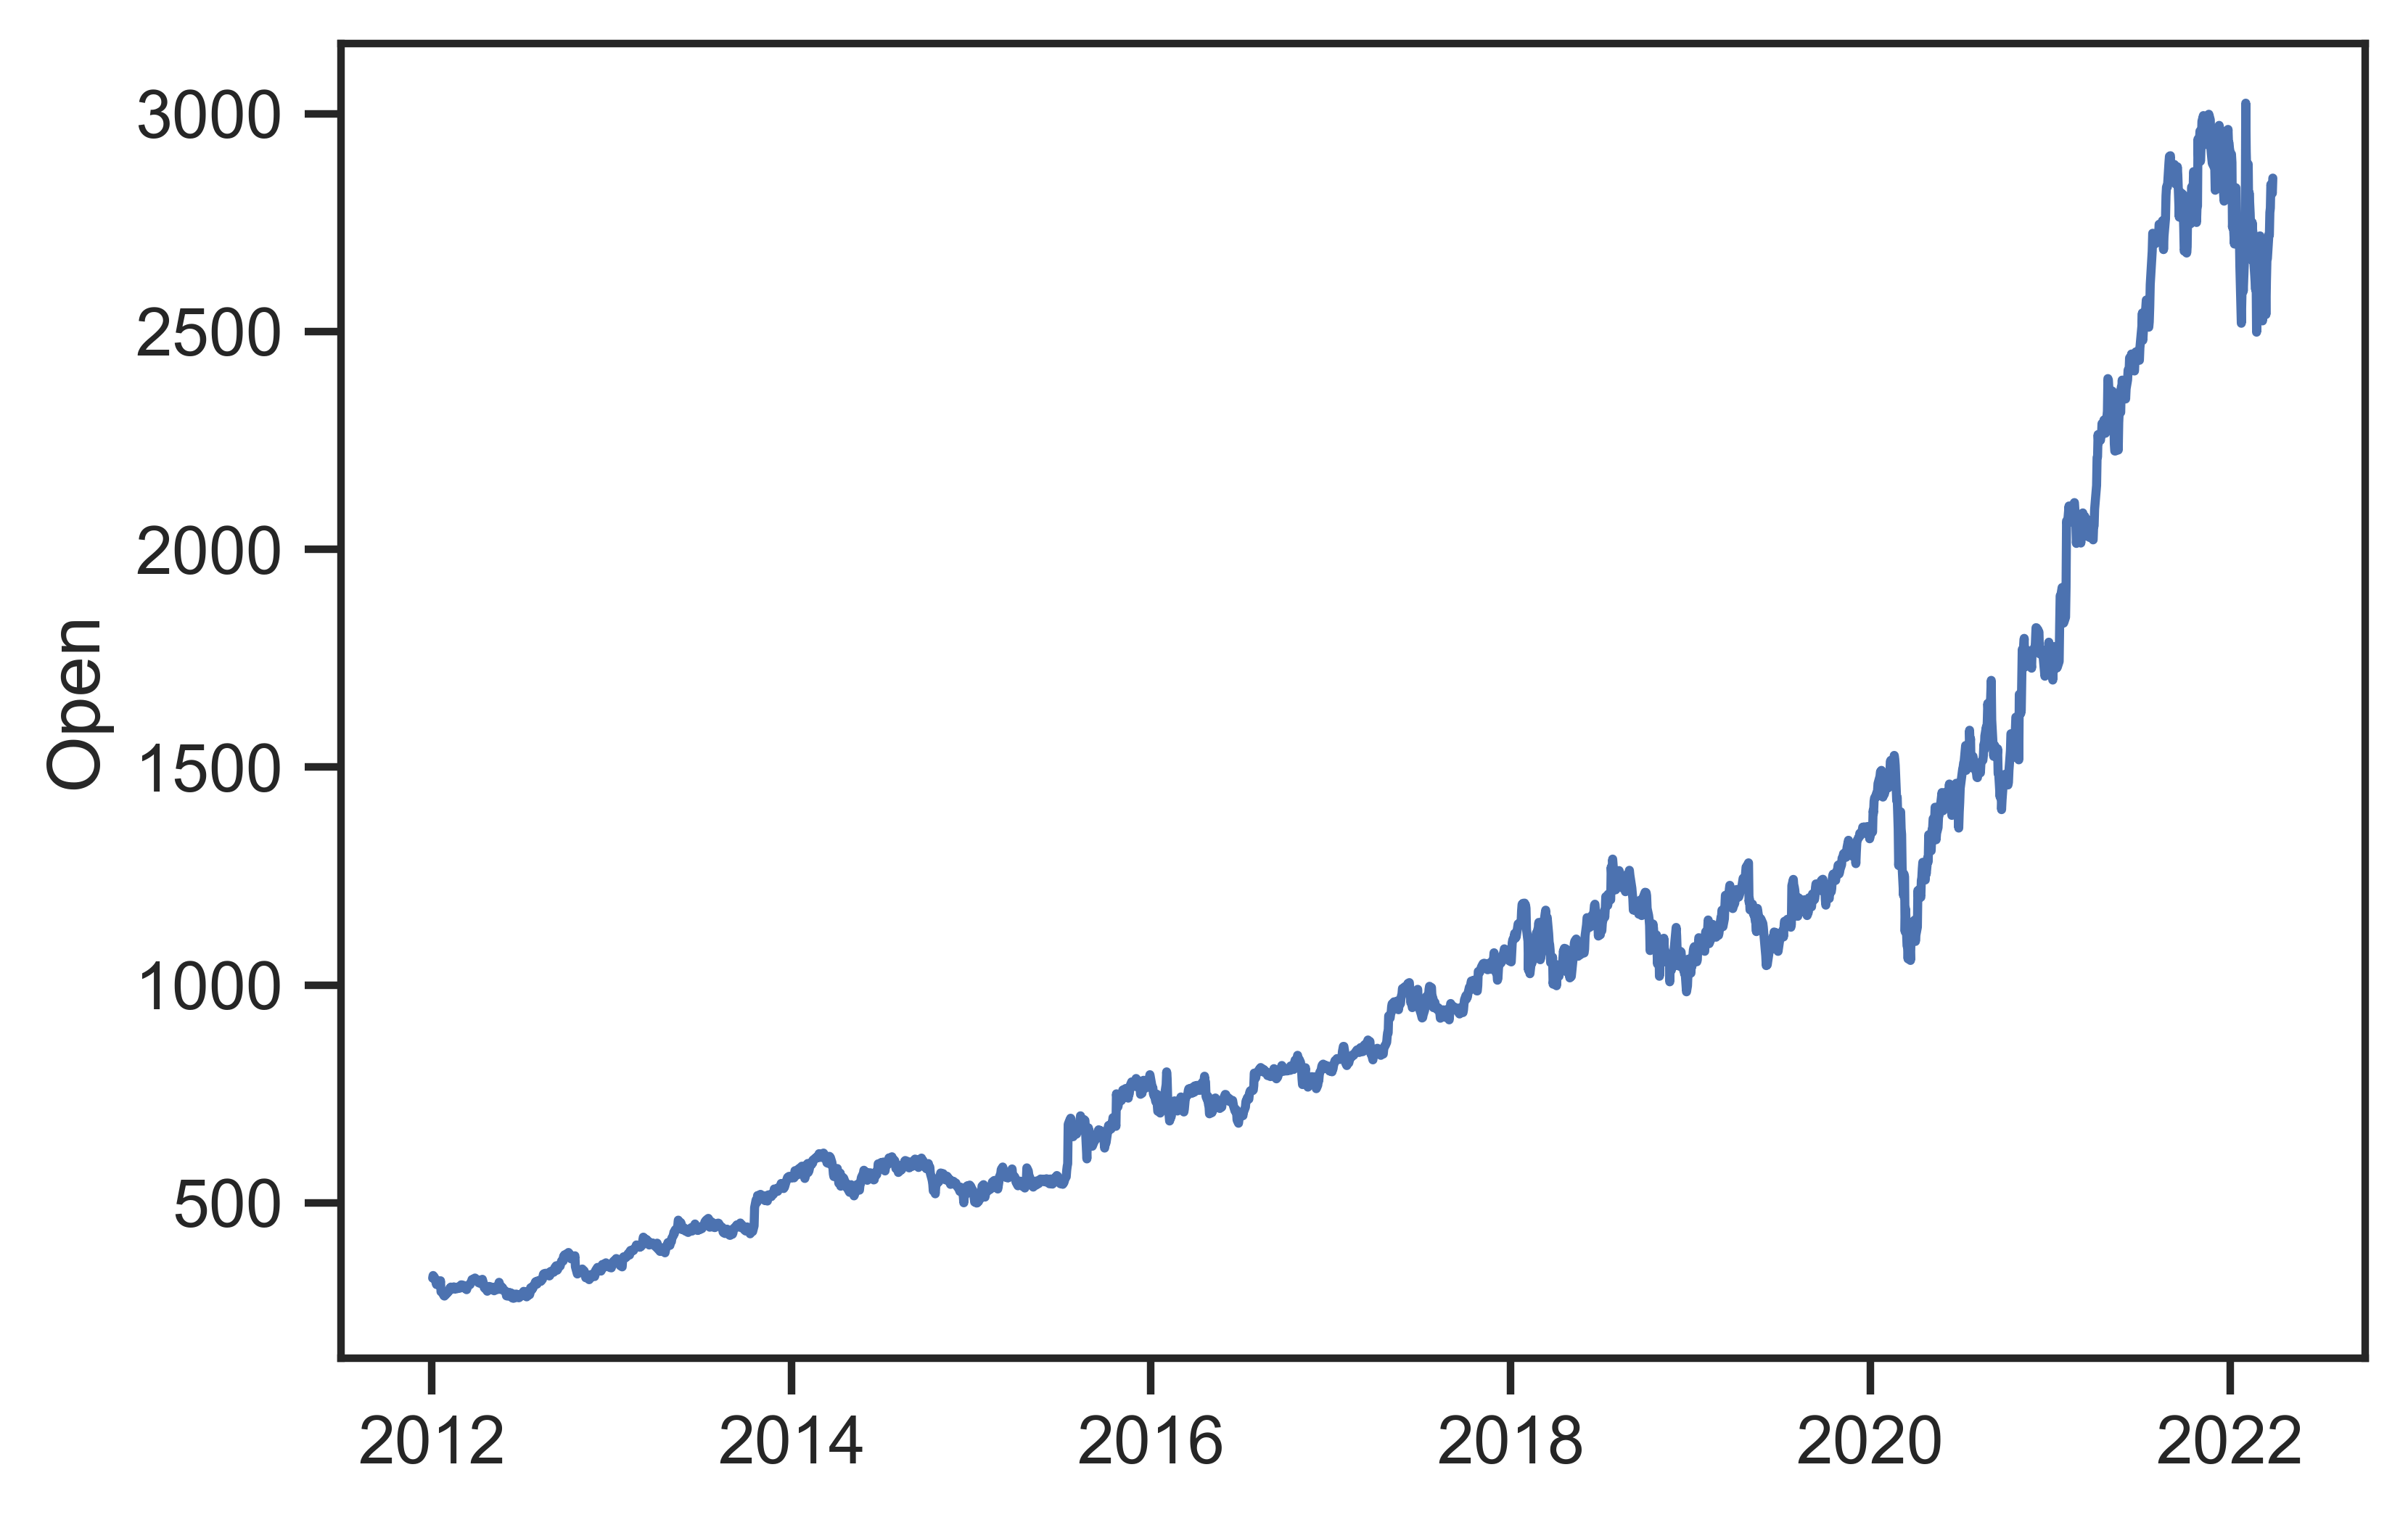

In [79]:
plotdata = pd.concat((stock_df["Open"], predicted_data), 1)
plotdata = plotdata.iloc[500:, :]

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

sns.lineplot(data=plotdata["Open"])
sns.lineplot(data=plotdata["Predicted"])
plt.show()
